In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ! scp ozstar:/fred/oz002/hqiu/CRAFT_simulation/purenoise/*.cand .
data=np.loadtxt('noiselimit_allwidths.cand').T


In [3]:
snr=data[0]
dm=data[5]
idt=data[4]
time=data[2]
boxcar=data[3]
# mask=(boxcar==0)#*(idt==1)
# print(np.sum(mask))
print(len(np.unique(idt)))
print(len(snr))

4096
689235


65659969.13733051


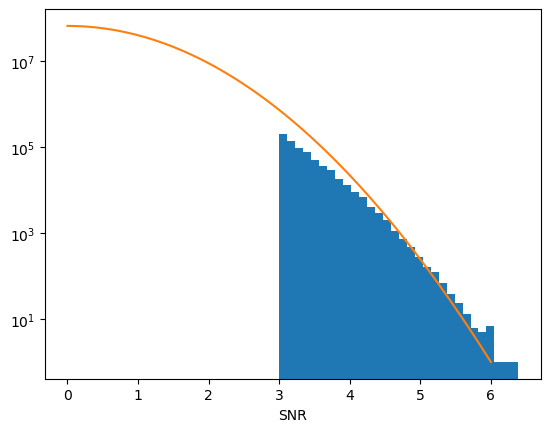

In [4]:
plt.hist(snr,bins=30)
plt.xlabel('SNR')
plt.yscale('log')
t=np.linspace(0,6,100)
# print(t)
A=np.exp(0.5*6**2)
print(A)
plt.plot(t,A*np.exp(-1/2*((t-0)**2)/(1**2)))


Text(0, 0.5, 'SNR')

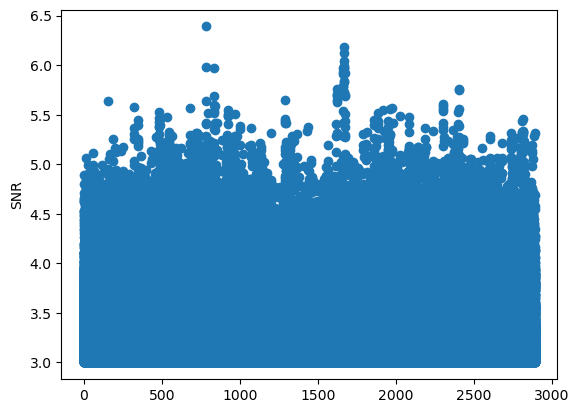

In [5]:
plt.scatter(dm,snr)
# plt.xlabel(f'DM pc cm-3')
plt.ylabel(f"SNR")

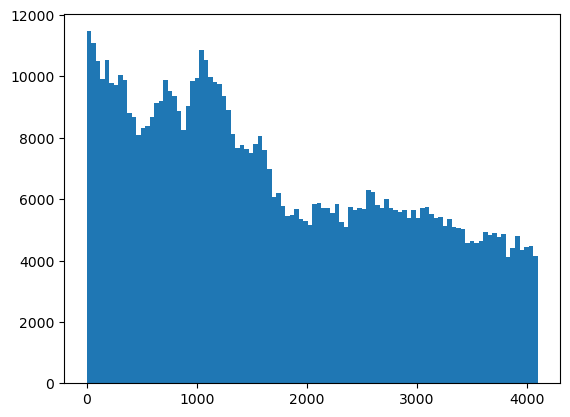

In [6]:
plt.hist(idt, bins=100);

(array([4.37864e+05, 1.63176e+05, 6.02740e+04, 1.99940e+04, 5.99500e+03,
        1.48700e+03, 3.48000e+02, 7.60000e+01, 1.80000e+01, 3.00000e+00]),
 array([3.   , 3.339, 3.678, 4.017, 4.356, 4.695, 5.034, 5.373, 5.712,
        6.051, 6.39 ]),
 <BarContainer object of 10 artists>)

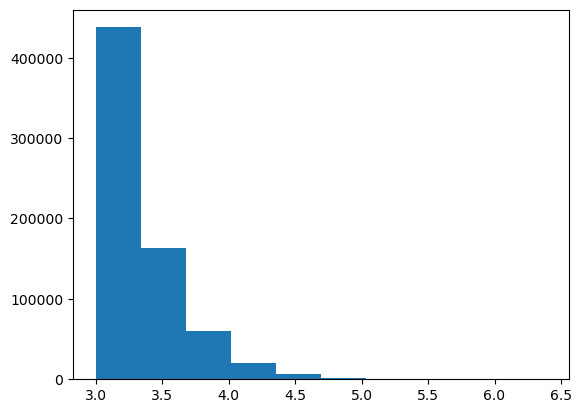

In [7]:
plt.hist(snr,bins=10)

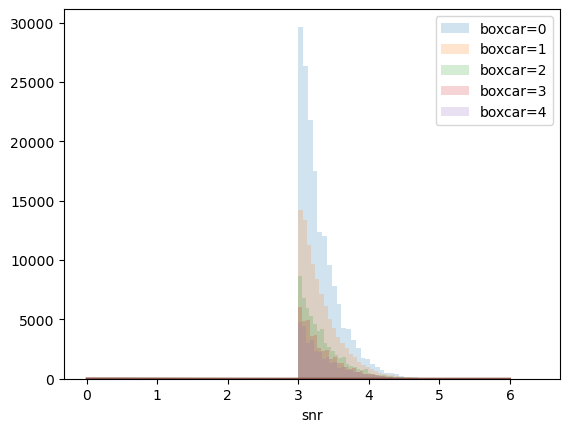

In [8]:
%matplotlib inline

for icar in range(5):
    filt = (boxcar==icar)#*(idt<2)
    plt.hist(snr[filt], bins=50,alpha=0.2,label=f'boxcar={icar}')
plt.xlabel('snr')
t=np.linspace(0,6,100)
# print(t)
plt.plot(t,20*np.exp(-1/2*((t-0)**2)/(1.1**2)))
plt.legend()

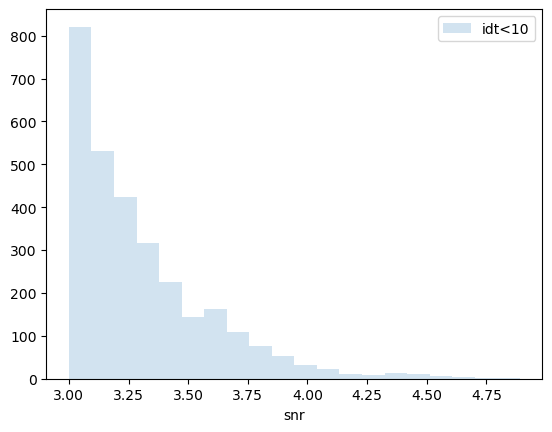

In [9]:

filt = idt<10
plt.hist(snr[filt], bins=20,alpha=0.2,label=f'idt<10')
filt = (idt>10)#&(idt<4)
# plt.hist(snr[filt], bins=20,alpha=0.2,label=f'idt>10')
plt.xlabel('snr')
plt.legend()

In [10]:
xx = np.random.normal(size=int(1e6))
yy = xx**2

In [11]:
yy.shape

(1000000,)

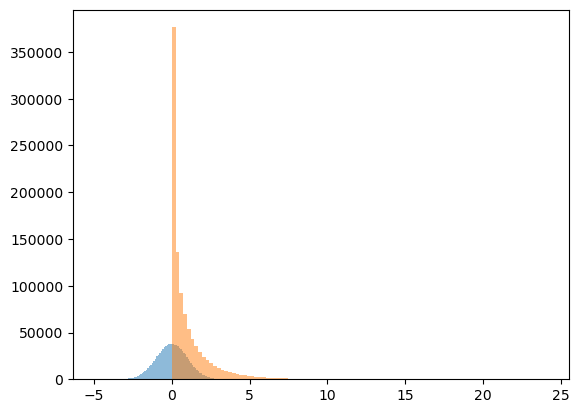

In [12]:
plt.hist(xx, bins=100, alpha=0.5);
plt.hist(yy, bins=100, alpha=0.5);

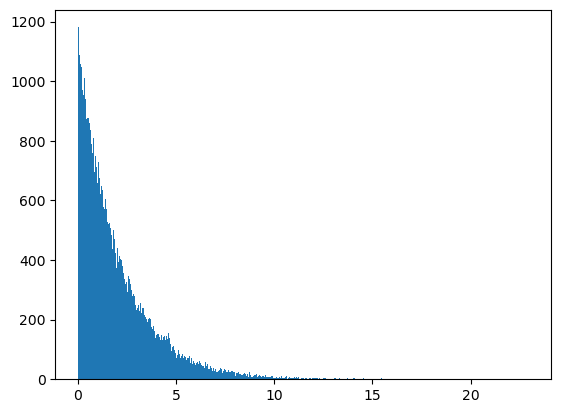

In [13]:
a=np.random.randn(100000)
b=np.random.randn(100000)
y=(a**2+b**2)
plt.hist(y,bins=1000)
# plt.xscale('log')
plt.show()

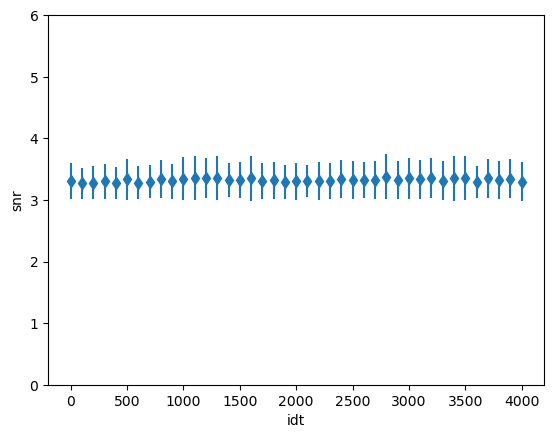

In [14]:
for i in np.arange(0,4096,100):
    snry=snr[(idt>i) *(idt < (i+10))]
    y=np.mean(snry)
    yerr=np.std(snry)
    plt.errorbar(i,y,yerr=yerr,marker='d',c='C0')
plt.xlabel('idt')
plt.ylabel('snr')
plt.ylim(0,6)
plt.show()

Text(0, 0.5, 'ncands')

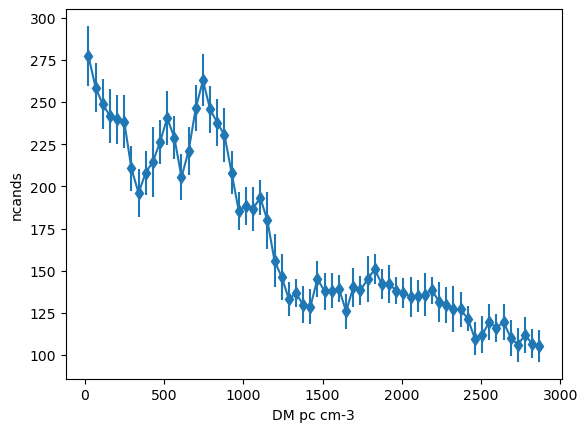

In [15]:
x,y=np.unique(dm,return_counts=True)
plt.errorbar(x.reshape(64,-1).mean(1),y.reshape(64,-1).mean(1),yerr=y.reshape(64,-1).std(1),marker='d')
# plt.scatter(x,y,marker='d')
plt.xlabel('DM pc cm-3')
plt.ylabel('ncands')
# print(y)

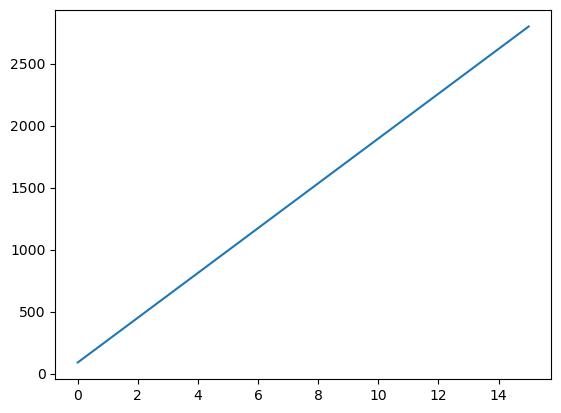

In [16]:
plt.plot(x.reshape(16,-1).mean(1))

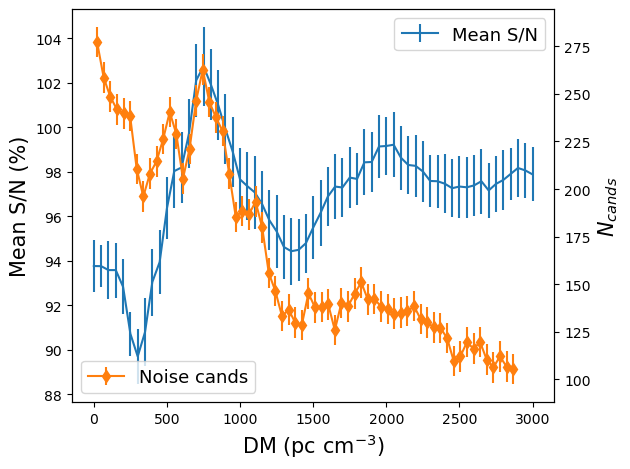

In [19]:
from scipy.signal import detrend
data=np.load("../fredda_hifreq_single.npy")
fig, ax1 = plt.subplots()
bins=64
ax2 = ax1.twinx()
ax1.errorbar(np.arange(0,3001,50),data.mean(axis=1),data.std(axis=1),label='Mean S/N')
ax2.errorbar(x.reshape(bins,-1).mean(1),y.reshape(bins,-1).mean(1),yerr=np.sqrt(4096/bins),marker='d',color='C1',label='Noise cands')
# ax2.errorbar(x.reshape(bins,-1).mean(1),detrend(y.reshape(bins,-1).mean(1)),yerr=y.reshape(bins,-1).std(1),marker='d',color='C2',label='Detrended noise')

ax1.set_xlabel('DM (pc cm$^{-3}$)',fontsize=15)
ax1.set_ylabel('Mean S/N (%)',fontsize=15)
ax2.set_ylabel('$N_{cands}$',fontsize=15)
ax1.legend(fontsize=13)
ax2.legend(loc=3,fontsize=13)
plt.tight_layout()
plt.savefig('noise counts')